Importing Necessary Modules

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score

Reading Data and performing Data Analysis

In [17]:
training_dataset = pd.read_csv("Dataset.csv")

In [18]:
data_cols = training_dataset.columns
data_cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [19]:
training_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [21]:
training_dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
def pie_plot(df, cols_list):
    fig, axes = plt.subplots(1, 2)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

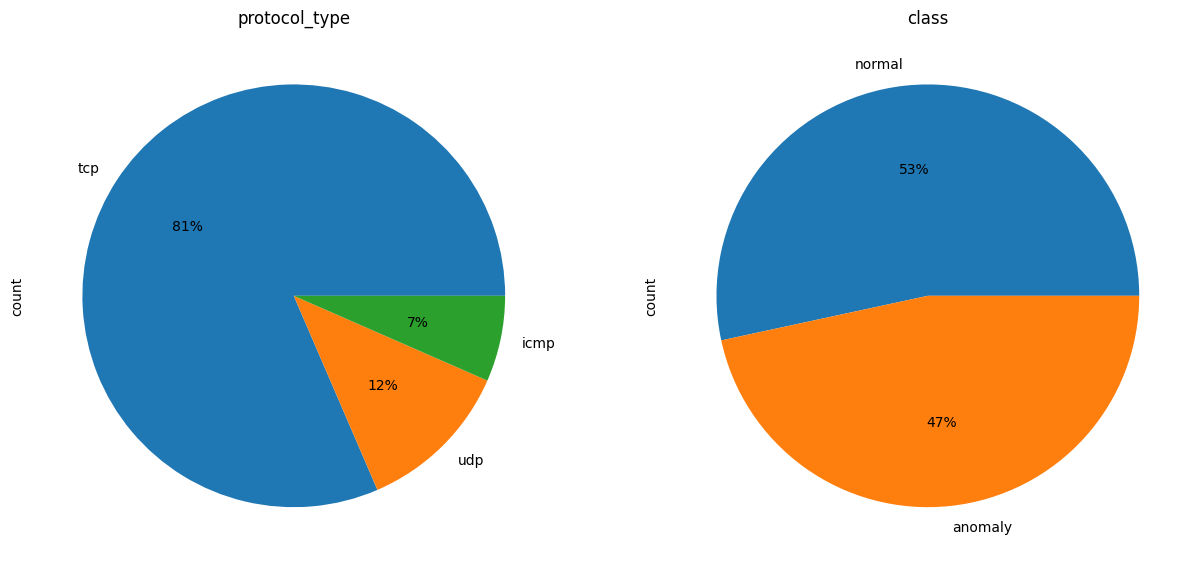

In [23]:
pie_plot(training_dataset, ['protocol_type', 'class'])

Preprocessing of Data

In [24]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [25]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'class']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['class'] == "normal", "class"] = 0
    dataframe.loc[dataframe['class'] != 0, "class"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login'])
    return dataframe

In [26]:
scaled_train = preprocess(training_dataset)

Train-Test Split

In [27]:
x = scaled_train.drop('class', axis = 1).values
y = scaled_train['class'].values

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

c:\Users\sreya\miniconda3\envs\tensorgpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 89.13313154369077  Test Accuracy Logistic Regression 90.03770589402659
Training Precesion Logistic Regression 87.1434477056635  Test Precesion Logistic Regression 88.09815950920246
Training Recall Logistic Regression 89.91256131371294  Test Recall Logistic Regression 91.07822410147992


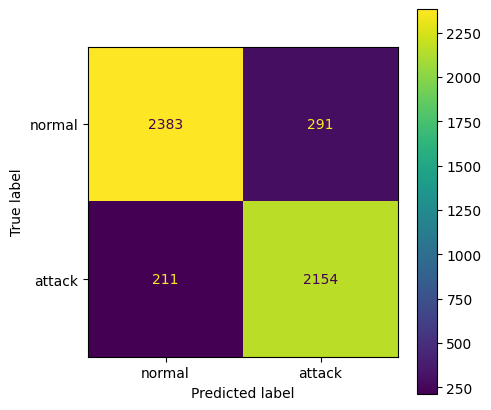

In [29]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifier 98.0846524090706  Test Accuracy KNeighborsClassifier 98.0353244691407
Training Precesion KNeighborsClassifier 98.40654608096469  Test Precesion KNeighborsClassifier 98.2127659574468
Training Recall KNeighborsClassifier 97.46214544679036  Test Recall KNeighborsClassifier 97.58985200845666


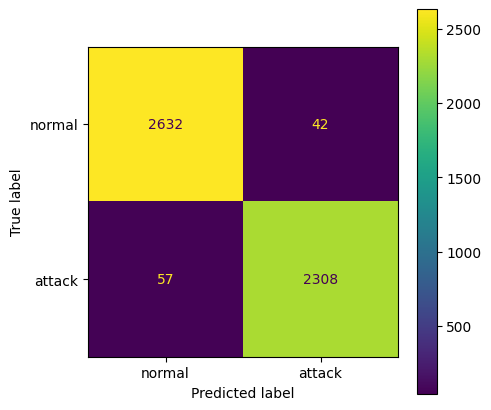

In [30]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy GaussianNB 92.56190145387784  Test Accuracy GaussianNB 93.78845008930344
Training Precesion GaussianNB 92.16525741196617  Test Precesion GaussianNB 93.80871050384287
Training Recall GaussianNB 91.8212838558328  Test Recall GaussianNB 92.89640591966173


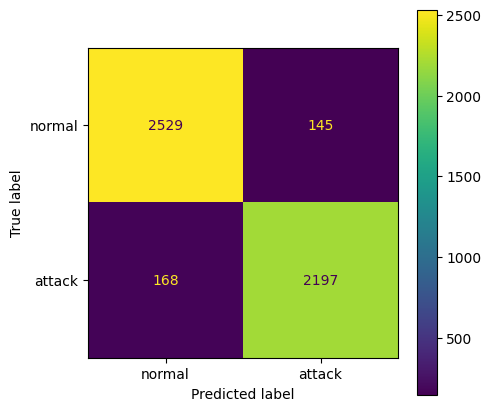

In [31]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

In [32]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

c:\Users\sreya\miniconda3\envs\tensorgpu\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sreya\miniconda3\envs\tensorgpu\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC 97.41973899667543  Test Accuracy Linear SVC 97.53919428458028
Training Precesion Linear SVC 96.24138651075381  Test Precesion Linear SVC 96.32079371641174
Training Recall Linear SVC 98.29387929195991  Test Recall Linear SVC 98.5200845665962


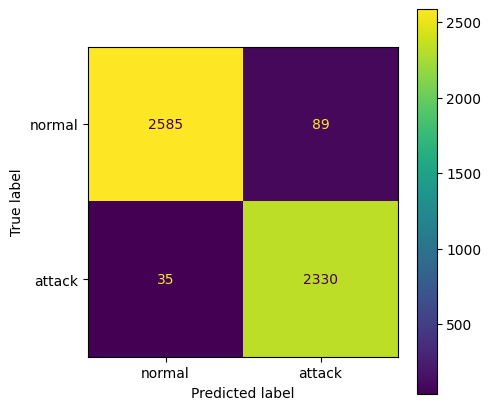

In [33]:
evaluate_classification(lin_svc, "Linear SVC", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.56340543758682
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.28481278923013
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.78858350951374


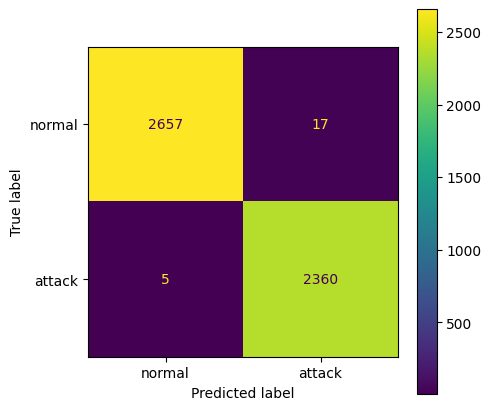

In [34]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

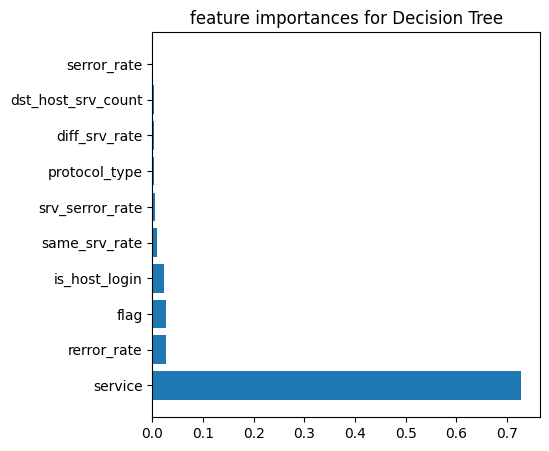

In [35]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(5,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = training_dataset.drop(['class'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=10)

[Text(0.5, 0.875, 'x[1] <= -0.056\ngini = 0.498\nsamples = 20153\nvalue = [10775, 9378]'),
 Text(0.25, 0.625, 'x[60] <= 0.5\ngini = 0.15\nsamples = 9311\nvalue = [763, 8548]'),
 Text(0.125, 0.375, 'x[2] <= 0.005\ngini = 0.065\nsamples = 8653\nvalue = [293, 8360]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 8465\nvalue = [137, 8328]'),
 Text(0.1875, 0.125, 'gini = 0.282\nsamples = 188\nvalue = [156, 32]'),
 Text(0.375, 0.375, 'x[26] <= -0.211\ngini = 0.408\nsamples = 658\nvalue = [470, 188]'),
 Text(0.3125, 0.125, 'gini = 0.032\nsamples = 186\nvalue = [3, 183]'),
 Text(0.4375, 0.125, 'gini = 0.021\nsamples = 472\nvalue = [467, 5]'),
 Text(0.75, 0.625, 'x[52] <= 0.5\ngini = 0.141\nsamples = 10842\nvalue = [10012, 830]'),
 Text(0.625, 0.375, 'x[5] <= 0.5\ngini = 0.072\nsamples = 10369\nvalue = [9980, 389]'),
 Text(0.5625, 0.125, 'gini = 0.031\nsamples = 9952\nvalue = [9796, 156]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 417\nvalue = [184, 233]'),
 Text(0.875, 0.375, 'x[1] <= 0.

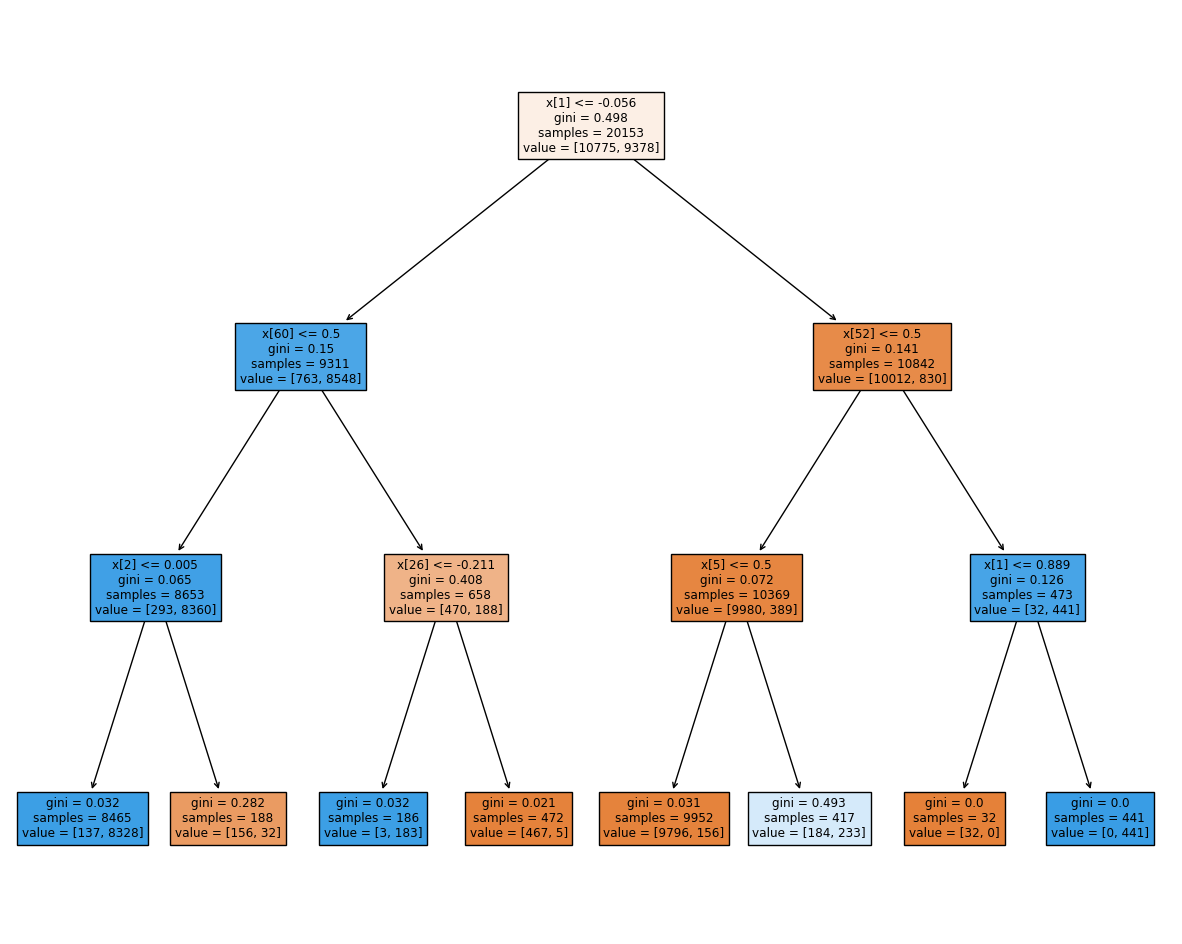

In [36]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 99.761857511411
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 99.83058026260059
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 99.66173361522199


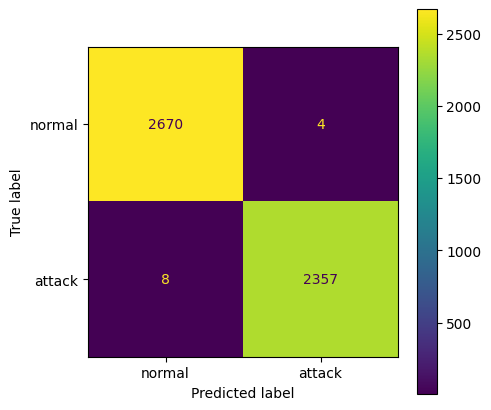

In [37]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

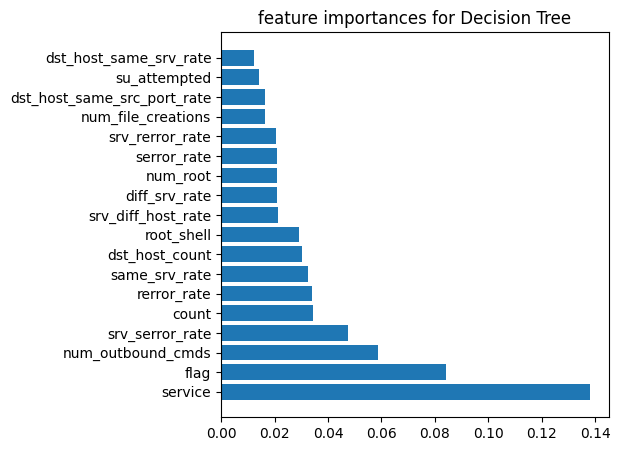

In [38]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [40]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7808      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [42]:
x_train = np.asarray(x_train).astype('int')
y_train = np.asarray(y_train)
x_test = np.asarray(x_test).astype('int')
y_test = np.asarray(y_test)

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [44]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, verbose=1)

Epoch 1/20
504/504 [==============================] - 5s 7ms/step - loss: 123.5877 - accuracy: 0.8968 - val_loss: 2.8041 - val_accuracy: 0.9581
Epoch 2/20
504/504 [==============================] - 3s 7ms/step - loss: 46.0681 - accuracy: 0.9501 - val_loss: 0.3972 - val_accuracy: 0.9653
Epoch 3/20
504/504 [==============================] - 4s 7ms/step - loss: 18.6143 - accuracy: 0.9598 - val_loss: 0.2179 - val_accuracy: 0.9749
Epoch 4/20
504/504 [==============================] - 4s 7ms/step - loss: 7.8997 - accuracy: 0.9661 - val_loss: 0.1962 - val_accuracy: 0.9705
Epoch 5/20
504/504 [==============================] - 3s 7ms/step - loss: 3.1298 - accuracy: 0.9700 - val_loss: 0.1842 - val_accuracy: 0.9764
Epoch 6/20
504/504 [==============================] - 3s 7ms/step - loss: 0.9739 - accuracy: 0.9722 - val_loss: 0.1764 - val_accuracy: 0.9784
Epoch 7/20
504/504 [==============================] - 3s 7ms/step - loss: 0.5464 - accuracy: 0.9718 - val_loss: 0.1721 - val_accuracy: 0.9802
Ep

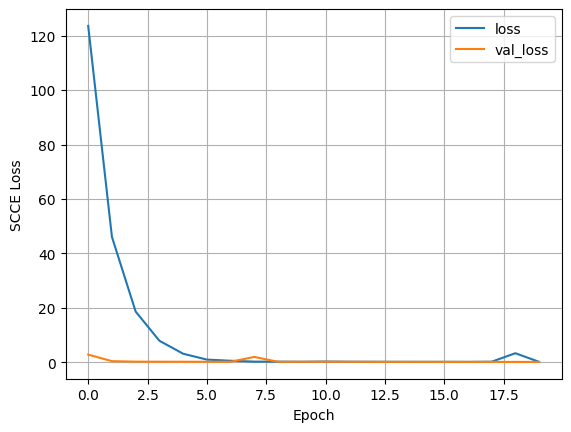

In [45]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

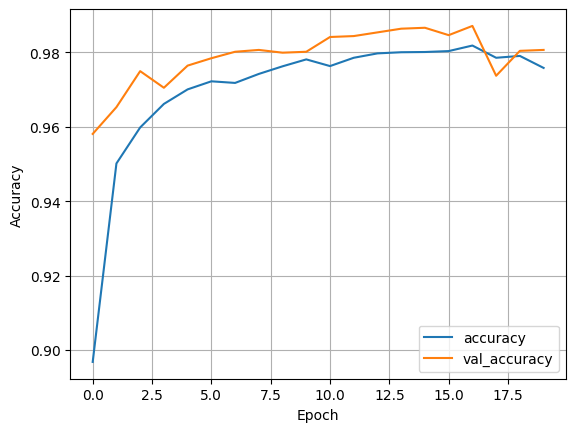

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [47]:
predictions = model.predict(x_test)
res = []
for each in predictions.tolist():
    res.append(round(each[0]))

accuracy = accuracy_score(y_test, res)

print(f"Testing Accuracy: {accuracy}")

158/158 [==============================] - 0s 1ms/step
Testing Accuracy: 0.9813455050605279


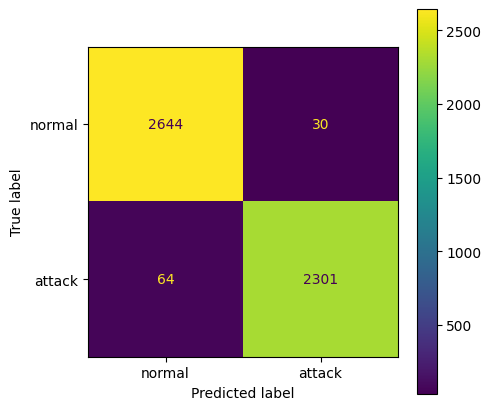

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, res)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm_display.plot(ax=ax)

In [49]:
print("Comparing Accuracies\n")

keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]

for i in range(len(keys)):
    print(keys[i]+":")
    print("Training Accuracy:"+str(values[i][0]*100)+"%")
    print("Testing Accuracy:"+str(values[i][1]*100)+"%")
    print("\n")

Comparing Accuracies

Logistic Regression:
Training Accuracy:89.13313154369077%
Testing Accuracy:90.03770589402659%


KNeighborsClassifier:
Training Accuracy:98.0846524090706%
Testing Accuracy:98.0353244691407%


GaussianNB:
Training Accuracy:92.56190145387784%
Testing Accuracy:93.78845008930344%


Linear SVC:
Training Accuracy:97.41973899667543%
Testing Accuracy:97.53919428458028%


DecisionTreeClassifier:
Training Accuracy:100.0%
Testing Accuracy:99.56340543758682%


RandomForestClassifier:
Training Accuracy:100.0%
Testing Accuracy:99.761857511411%




C:\Users\sreya\AppData\Local\Temp\ipykernel_8064\3701812322.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys)


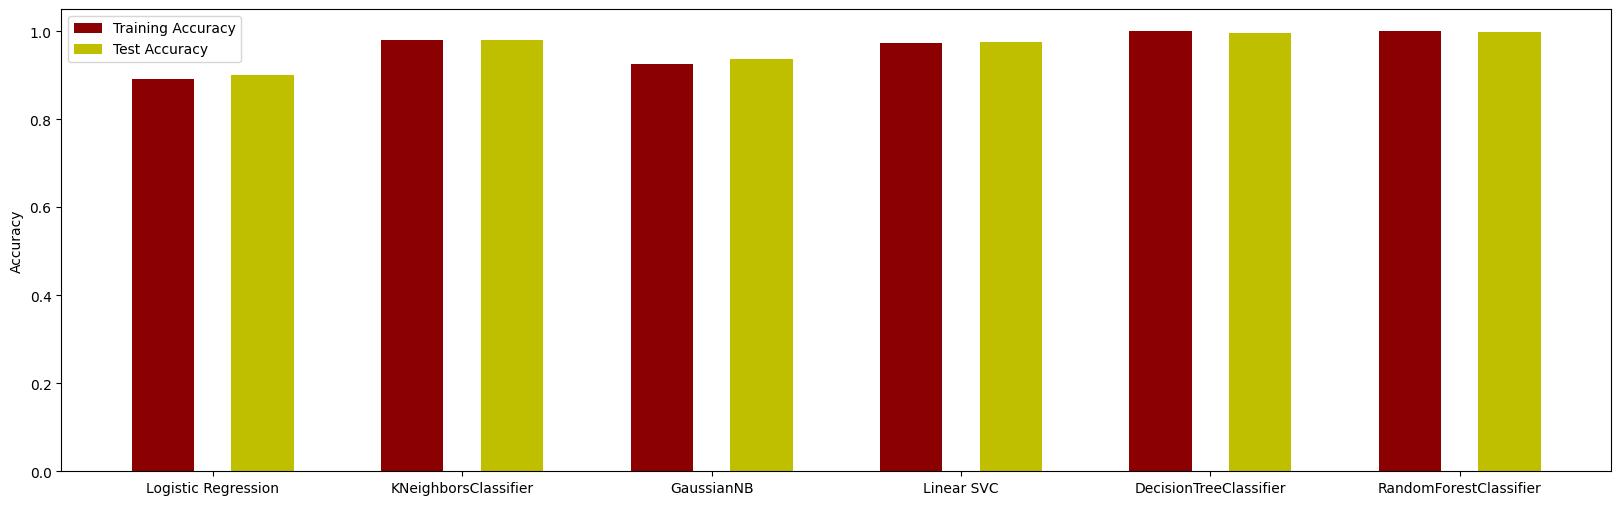

In [50]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

C:\Users\sreya\AppData\Local\Temp\ipykernel_8064\4117647720.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys)


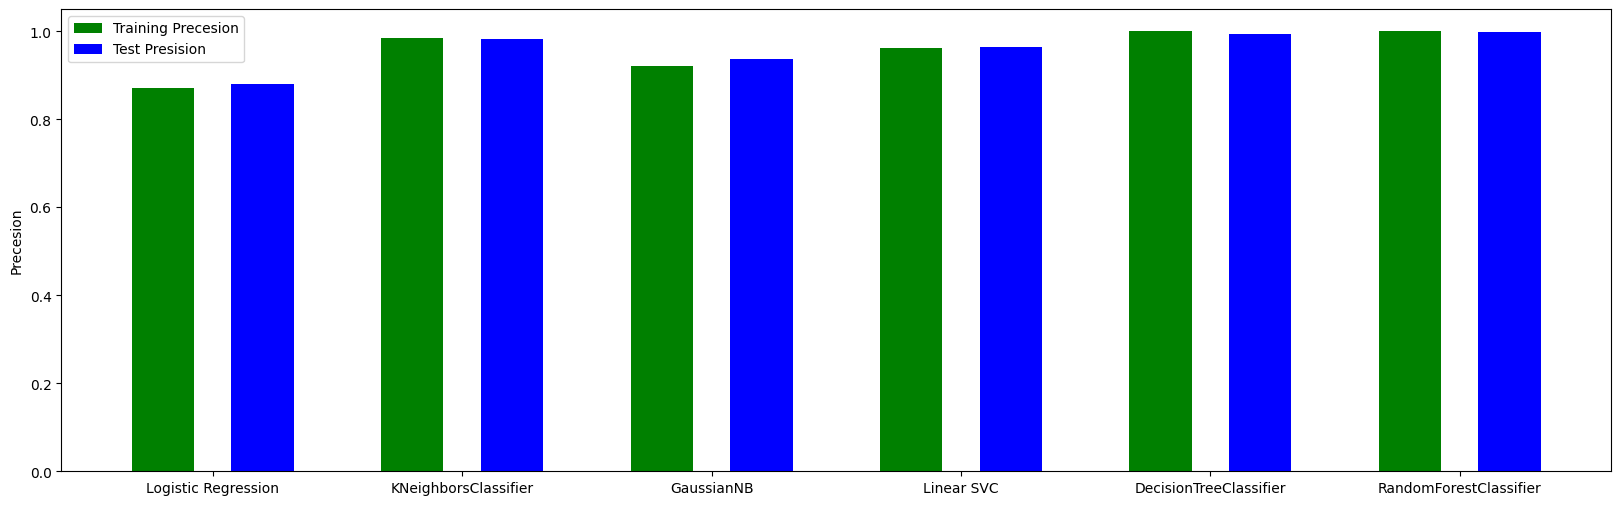

In [51]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

C:\Users\sreya\AppData\Local\Temp\ipykernel_8064\3848028254.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys)


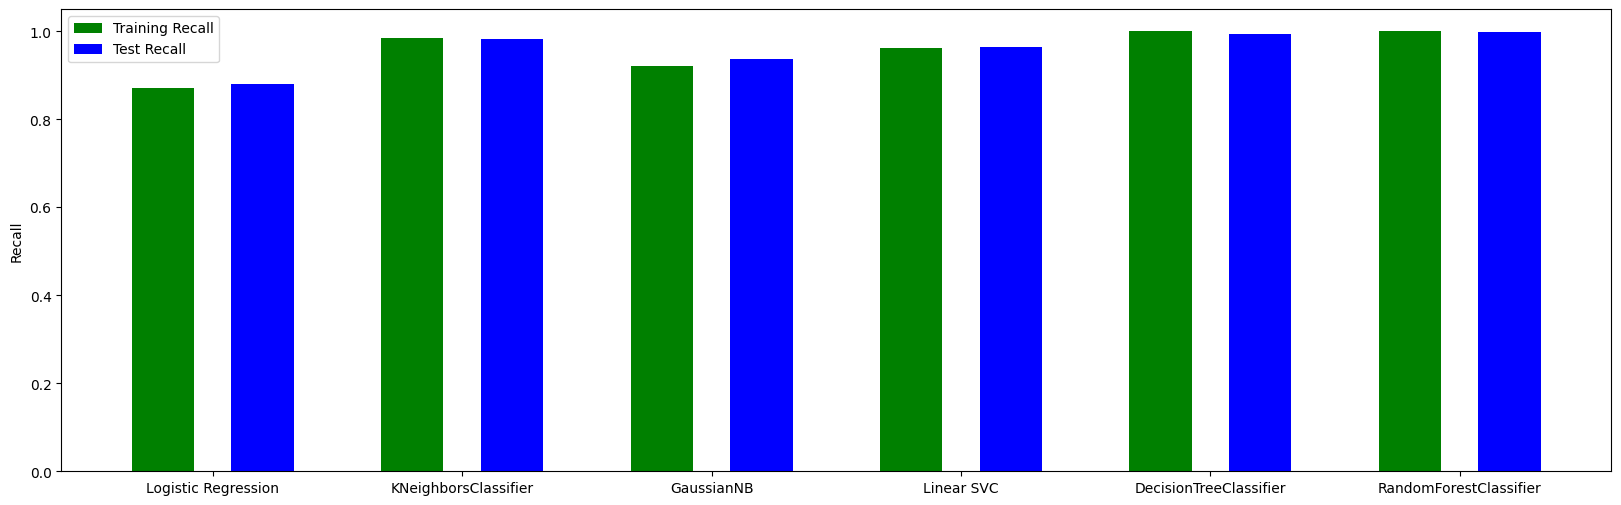

In [52]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()